# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [3]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.916):
{'logistic__alpha': 0.0001, 'pca__n_components': 30}


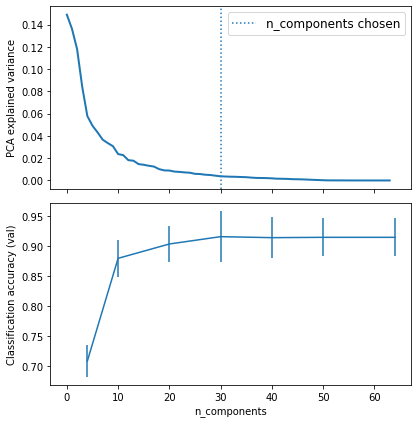

In [8]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

# 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多

In [9]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071866,0.020424,0.001014,0.001044,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.683333,0.583333,0.688022,0.710306,0.693593,0.671718,0.045122,27
1,0.040475,0.005946,0.000494,0.000056,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.897222,0.841667,0.905292,0.910864,0.844011,0.879811,0.030507,16
2,0.041958,0.006267,0.000546,0.000049,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.927778,0.855556,0.913649,0.933148,0.874652,0.900956,0.030561,14
3,0.050805,0.002601,0.000639,0.000092,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.938889,0.880556,0.933148,0.972145,0.855153,0.915978,0.042258,1
4,0.058714,0.006236,0.000885,0.000272,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.908333,0.877778,0.938719,0.947075,0.877437,0.909868,0.029328,11
5,0.062028,0.007856,0.000724,0.000064,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.902778,0.883333,0.933148,0.952646,0.883008,0.910983,0.027718,9
6,0.063348,0.007034,0.000792,0.000079,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.919444,0.866667,0.935933,0.947075,0.883008,0.910426,0.030795,10
7,1.403104,0.530999,0.000563,0.000054,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.727778,0.663889,0.732591,0.727019,0.690808,0.708417,0.026826,25
8,0.051655,0.004117,0.000605,0.000007,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.902778,0.844444,0.896936,0.908078,0.824513,0.875350,0.034144,18
9,0.055379,0.008370,0.000649,0.000166,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.872222,0.913649,0.941504,0.866295,0.903734,0.029570,13


In [10]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,1.403104,0.530999,0.000563,0.000054,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.727778,0.663889,0.732591,0.727019,0.690808,0.708417,0.026826,25
10,1,0.040475,0.005946,0.000494,0.000056,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.897222,0.841667,0.905292,0.910864,0.844011,0.879811,0.030507,16
20,9,0.055379,0.008370,0.000649,0.000166,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.872222,0.913649,0.941504,0.866295,0.903734,0.029570,13
30,3,0.050805,0.002601,0.000639,0.000092,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.938889,0.880556,0.933148,0.972145,0.855153,0.915978,0.042258,1
40,18,0.744221,0.069698,0.000790,0.000163,1,40,"{'logistic__alpha': 1.0, 'pca__n_components': 40}",0.938889,0.886111,0.919220,0.961003,0.866295,0.914304,0.034377,4
50,12,0.090700,0.010790,0.000708,0.000089,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.894444,0.947075,0.944290,0.863510,0.914864,0.031813,3
64,13,0.102635,0.017589,0.000970,0.000465,0.01,64,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.922222,0.891667,0.947075,0.947075,0.866295,0.914867,0.031706,2
